In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [94]:
#dataset
df = pd.read_csv('dataset.csv')

label_encoder = LabelEncoder()
rf = RandomForestClassifier()

In [95]:
# Replace 'Unknown' with NaN
df['Genetic Disorder'].replace('Unknown', np.nan, inplace=True)
df['Disorder Subclass'].replace('Unknown', np.nan, inplace=True)

df.dropna(inplace=True)

In [96]:
all_x_columns= [
    'Patient Age', "Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene',
    'Blood cell count (mcL)', "Mother's age", "Father's age", 'Status', 'Respiratory Rate (breaths/min)',
    'Heart Rate (rates/min)', 'Follow-up', 'Gender', 'Birth asphyxia',
    'Autopsy shows birth defect (if applicable)', 'Place of birth', 'Folic acid details (peri-conceptional)',
    'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
    'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'No. of previous abortion',
    'Birth defects', 'White Blood cell count (thousand per microliter)', 'Blood test result',
    'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'
]

df_encoded=df.copy()
for column in all_x_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

In [97]:
# Extract features and target
X = df_encoded.drop(columns=['Genetic Disorder', 'Disorder Subclass'], axis=1)
y = df_encoded['Disorder Subclass']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, stratify=y) # training as 50%
rf.fit(X_train, y_train)

RandomForestClassifier()

[0.05778738 0.01648725 0.01777313 0.02282802 0.01602179 0.07521455
 0.05923917 0.06088684 0.01447216 0.02284681 0.02265672 0.02288336
 0.02628974 0.02499958 0.02596915 0.02298797 0.02167148 0.02153289
 0.03368933 0.03337695 0.0213604  0.02266891 0.04307151 0.02314404
 0.07032897 0.0331721  0.02341852 0.02776522 0.03337994 0.03808748
 0.04398864]
Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min)', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Bir

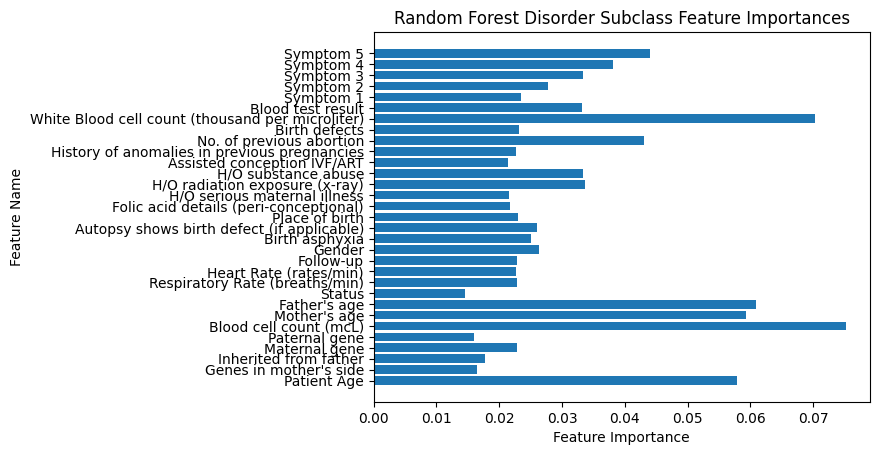

In [99]:
feature_importances_cat = rf.feature_importances_
print (feature_importances_cat)
import matplotlib.pyplot as plt

feature_names = X.columns 
print(feature_names)
plt.barh(feature_names, feature_importances_cat)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Disorder Subclass Feature Importances')
plt.show()

ANOVA

In [100]:
from sklearn.feature_selection import SelectKBest, f_classif

In [101]:
dfcolumns = pd.DataFrame(X.columns)
y = df_encoded['Disorder Subclass']

[ 1 27 28 29 30]
ANOVA:
                                             Feature  ANOVA Score
30                                         Symptom 5   297.194916
29                                         Symptom 4   213.676971
28                                         Symptom 3   162.366486
27                                         Symptom 2   113.895546
1                             Genes in mother's side    92.863838
2                              Inherited from father    82.321587
26                                         Symptom 1    80.366341
3                                      Maternal gene    72.190750
4                                      Paternal gene    65.963989
25                                 Blood test result     2.036075
24  White Blood cell count (thousand per microliter)     1.571590
19                               H/O substance abuse     1.469826
20                       Assisted conception IVF/ART     1.410879
5                             Blood cell count (mcL)

Text(0.5, 1.0, 'ANOVA Disorder Subclass')

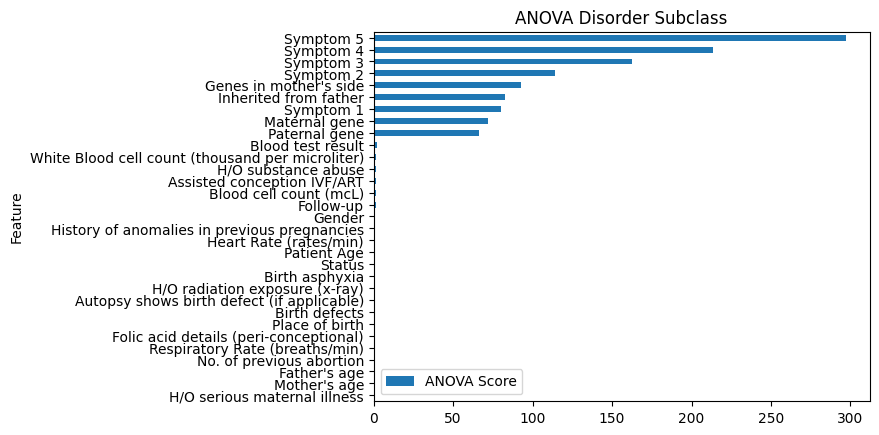

In [102]:
bestFeaturesANOVA = SelectKBest(f_classif, k=5)
fitANOVA = bestFeaturesANOVA.fit(X, y)

print(fitANOVA.get_support(indices=True))

scoresANOVA = pd.DataFrame(fitANOVA.scores_)

featureScoresANOVA = pd.concat([dfcolumns,scoresANOVA],axis=1)
featureScoresANOVA.columns = ['Feature','ANOVA Score']  #naming the dataframe columns


print("ANOVA:")
print(featureScoresANOVA.sort_values('ANOVA Score',ascending=False))  #print features sorted by score


# Plot ANOVA scores for each feature
featureScoresANOVA.sort_values('ANOVA Score',ascending=True).plot(kind='barh',x='Feature',color='tab:blue')
plt.title("ANOVA Disorder Subclass")


In [103]:
import seaborn as sns

In [104]:
df_encoded['Genetic Disorder'] = label_encoder.fit_transform(df_encoded['Genetic Disorder'].astype(str))
df_encoded['Disorder Subclass'] = label_encoder.fit_transform(df_encoded['Disorder Subclass'].astype(str))



Correlation with Genetic Disorder:
Disorder Subclass                                   0.411782
Symptom 2                                           0.020237
Symptom 1                                           0.018615
Blood test result                                   0.018551
Follow-up                                           0.014029
Heart Rate (rates/min)                              0.011060
Inherited from father                               0.010357
Assisted conception IVF/ART                         0.009012
Mother's age                                        0.008702
Maternal gene                                       0.008528
Patient Age                                         0.006339
Gender                                              0.005677
Autopsy shows birth defect (if applicable)          0.004311
Paternal gene                                       0.004207
Genes in mother's side                              0.004058
Folic acid details (peri-conceptional)          

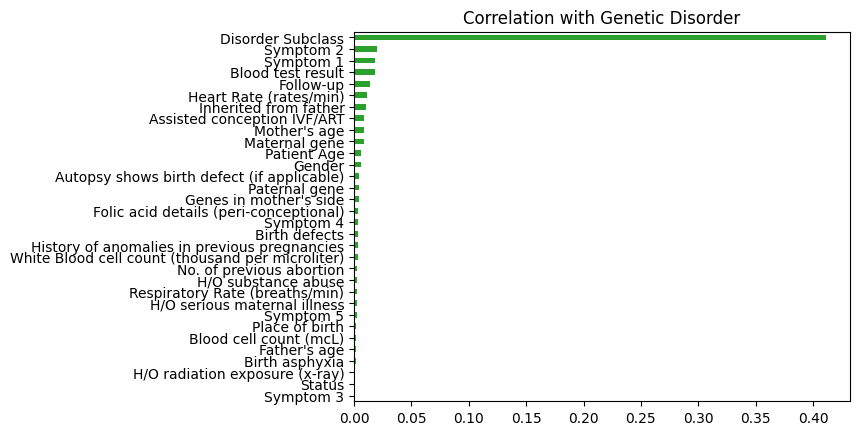

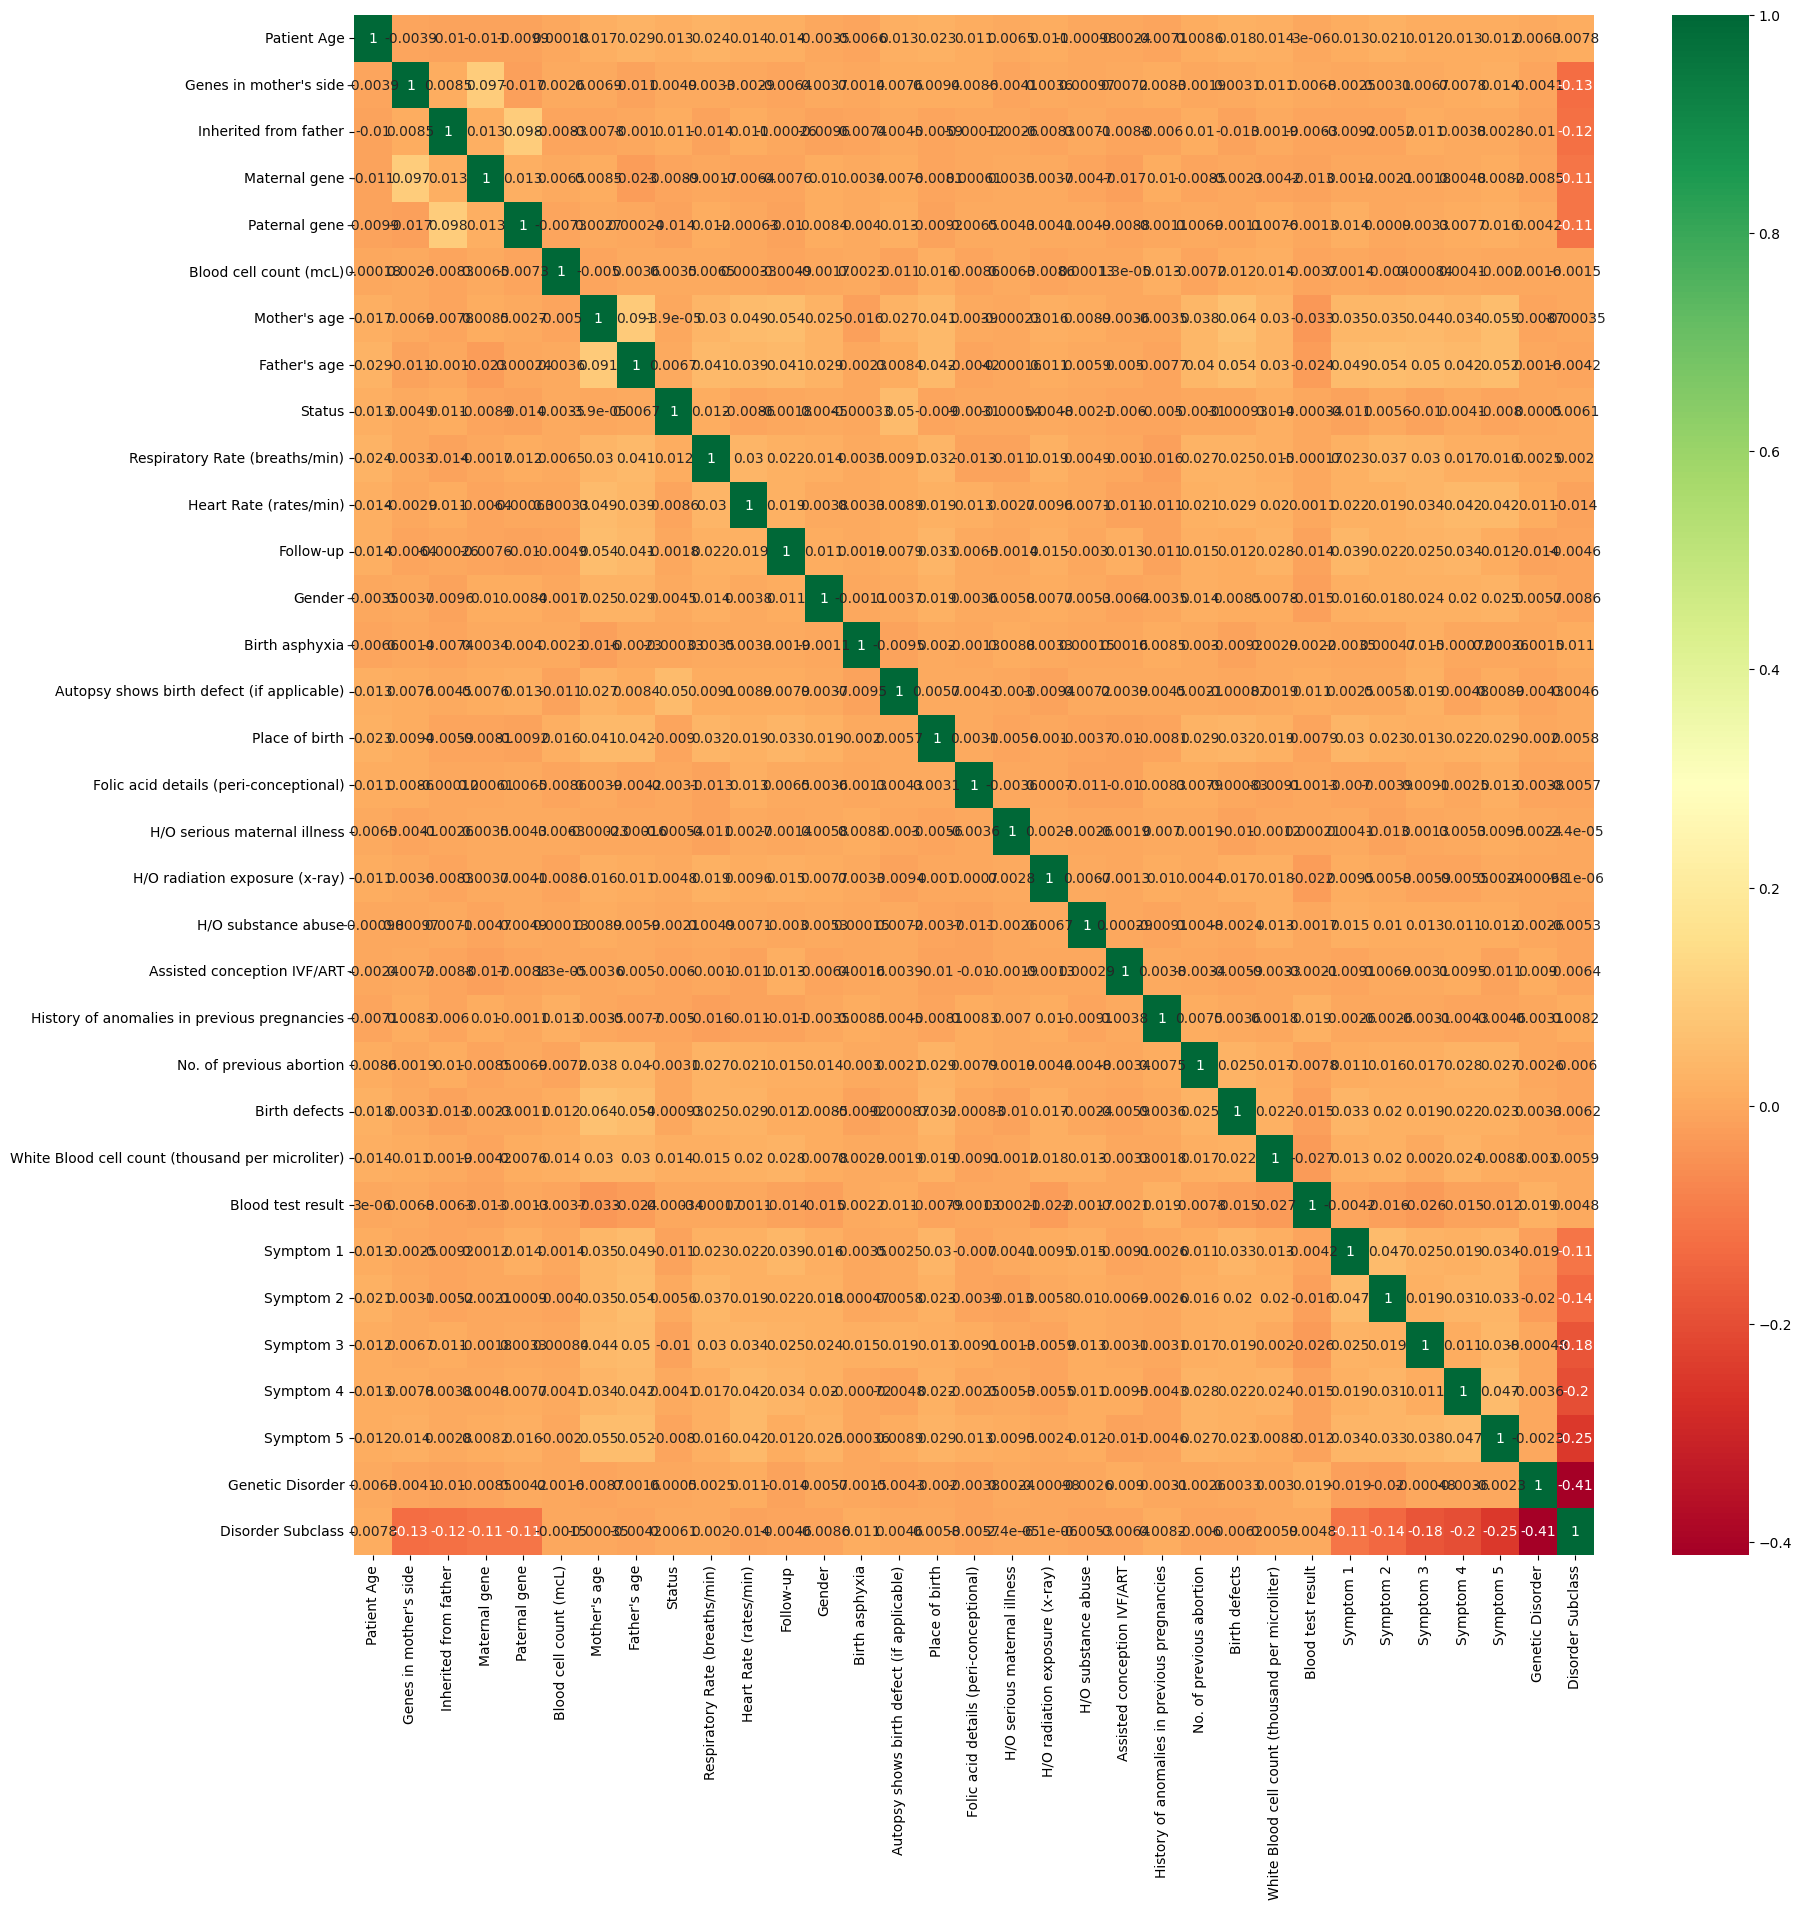

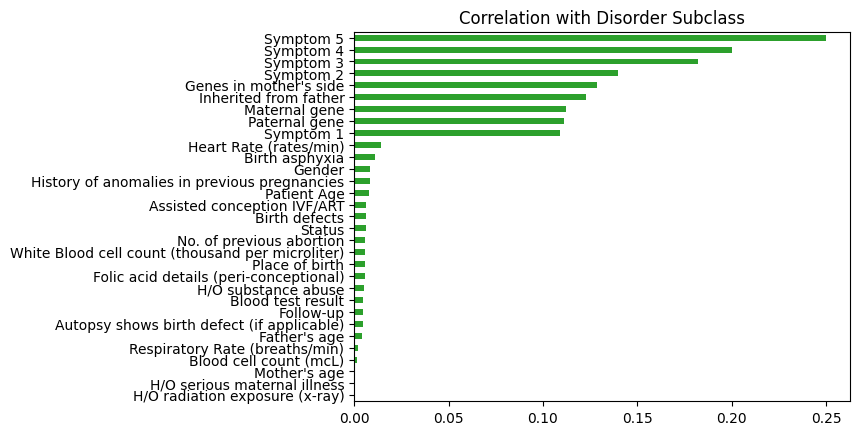

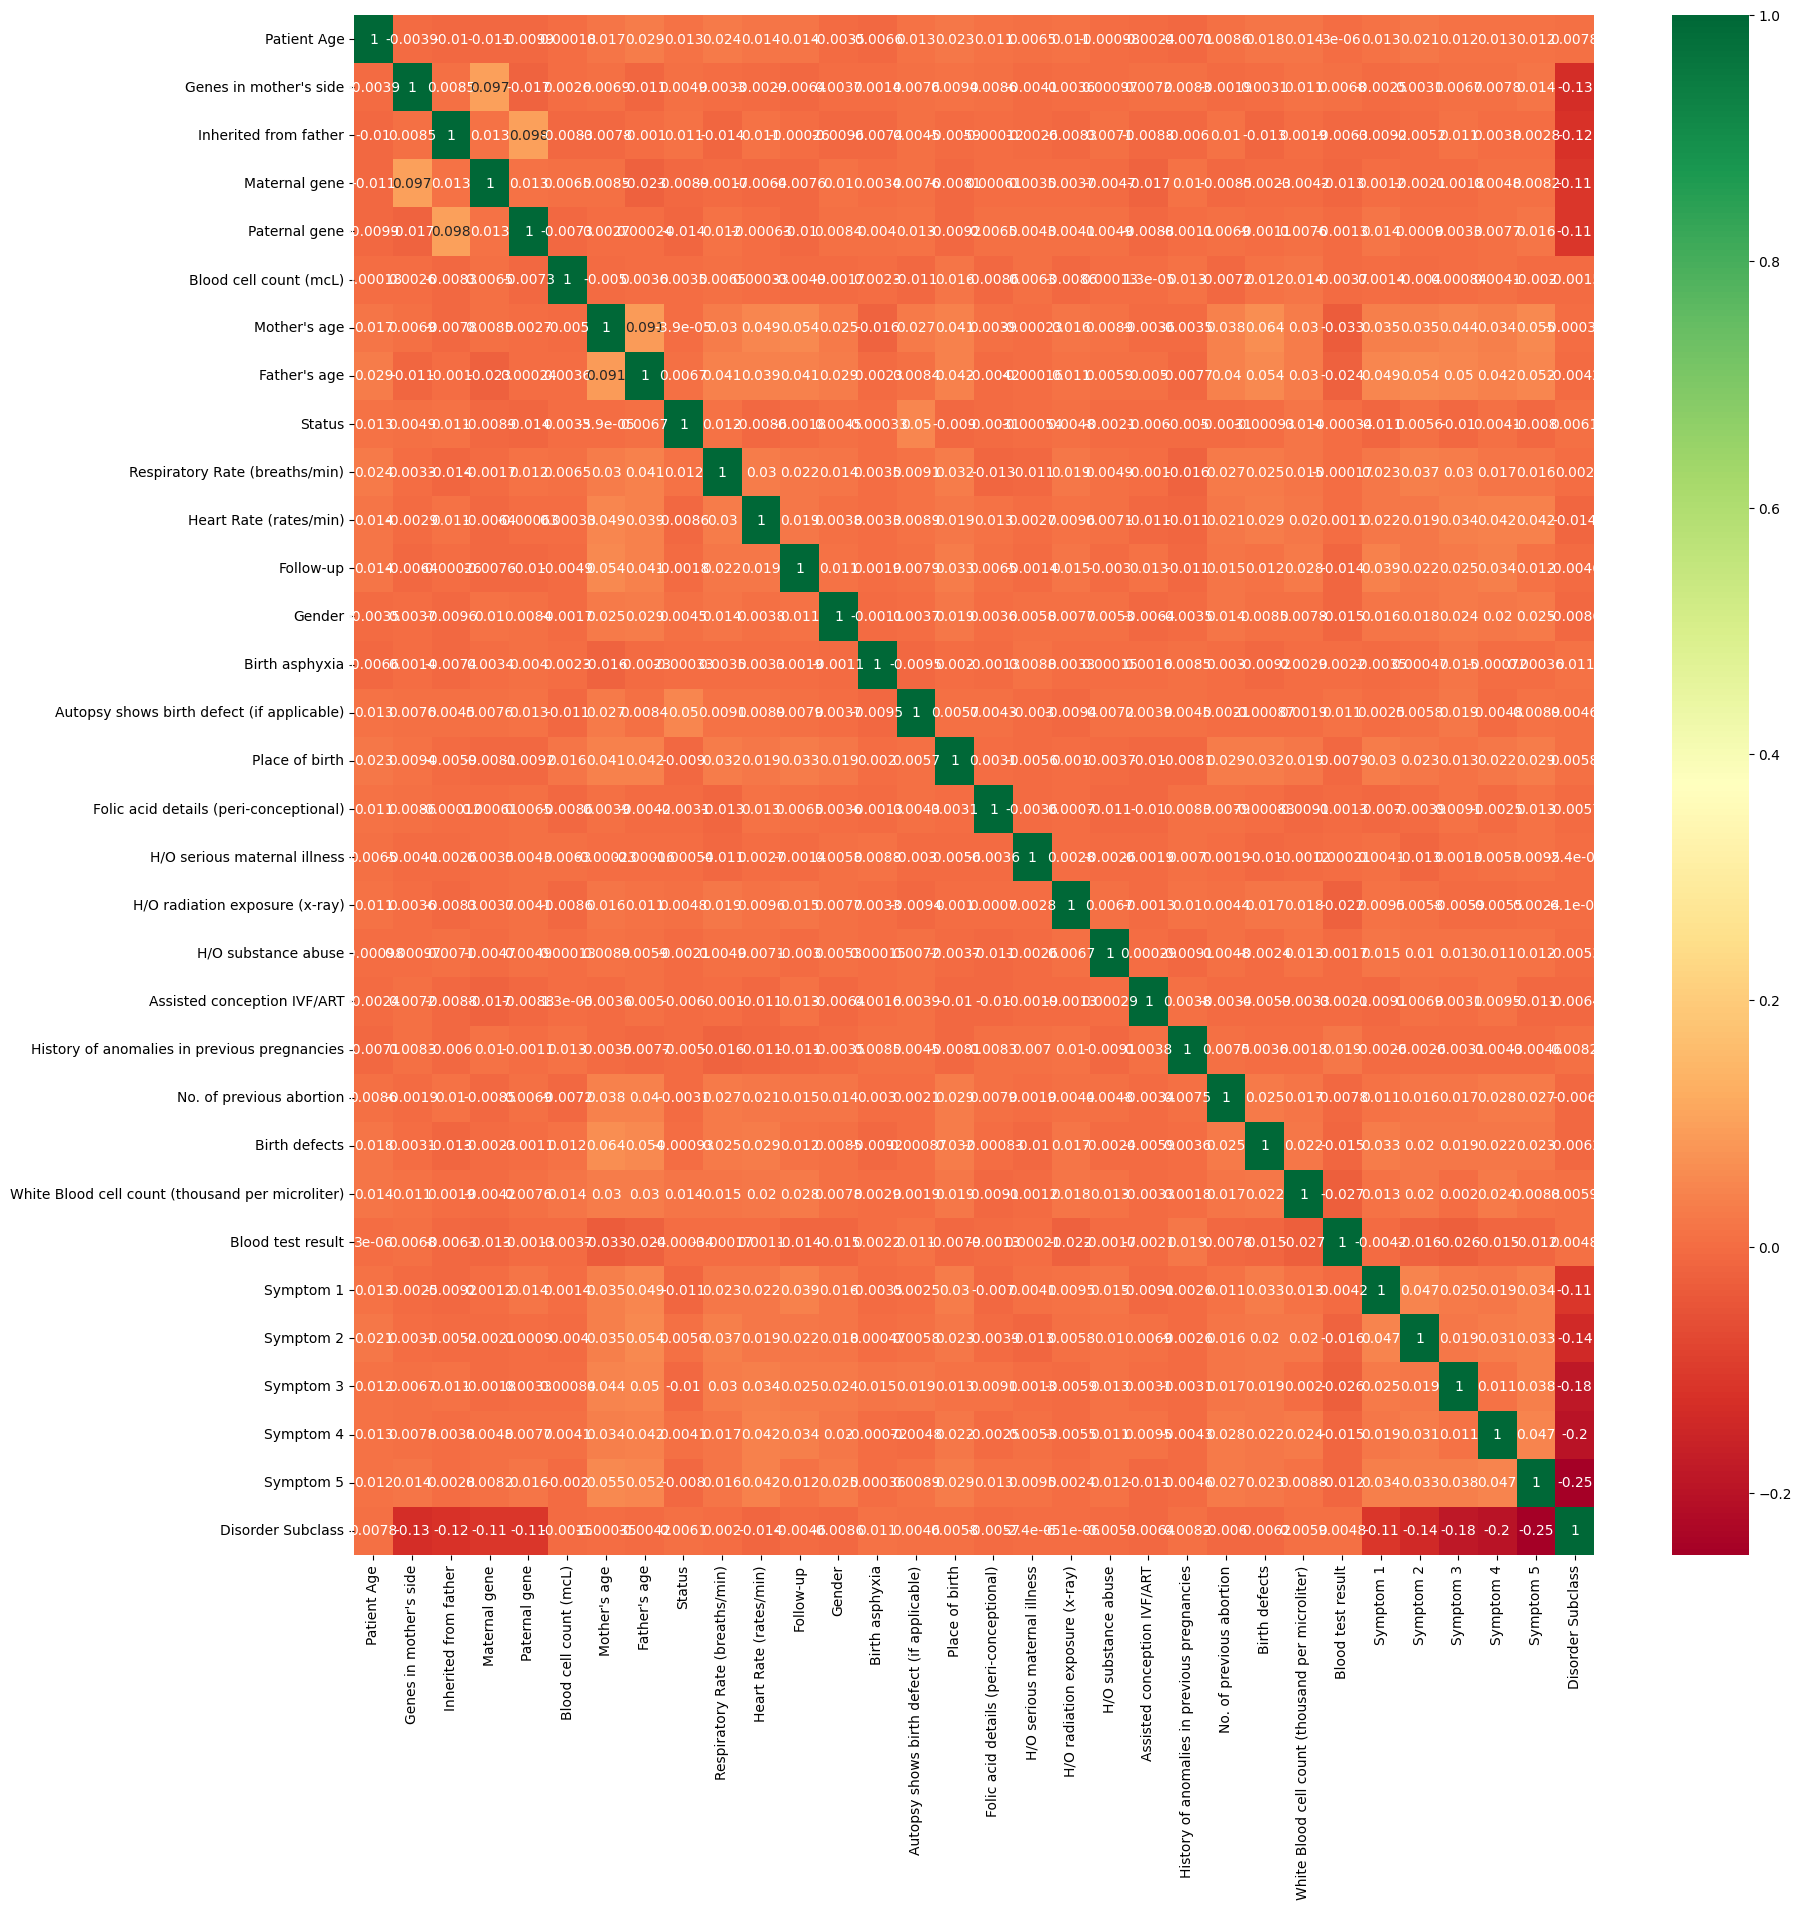

In [106]:
#3. Correlation Matrix

# Genetic Disorder
corrmat = df_encoded.corr()
top_corr_features = corrmat.index

correlation=corrmat['Genetic Disorder'] #column with the correlation of the features with DEATH_EVENT

correlation=abs(correlation) #use the absolute value of the correlation

correlation=correlation.drop(['Genetic Disorder'])


#Plot the correlation of each feature with the DEATH_EVENT
plt.figure()
correlation.sort_values(ascending=True).plot(kind='barh',color='tab:green')
plt.title("Correlation with Genetic Disorder")

plt.figure(figsize=(20,20))

# Disorder subclass


#Plot Heat Map of the the correlation
g=sns.heatmap(df_encoded[top_corr_features].corr(),annot=True,cmap="RdYlGn")

print("\n\nCorrelation with Genetic Disorder:")
print(correlation.sort_values(ascending=False))



# Disorder Subclass
corrmat = df_encoded.drop('Genetic Disorder',axis=1).corr()
top_corr_features = corrmat.index

correlation=corrmat['Disorder Subclass'] #column with the correlation of the features with DEATH_EVENT

correlation=abs(correlation) #use the absolute value of the correlation

correlation=correlation.drop(['Disorder Subclass'])


#Plot the correlation of each feature with the DEATH_EVENT
plt.figure()
correlation.sort_values(ascending=True).plot(kind='barh',color='tab:green')
plt.title("Correlation with Disorder Subclass")

plt.figure(figsize=(20,20))

# Disorder subclass


#Plot Heat Map of the the correlation
g=sns.heatmap(df_encoded[top_corr_features].corr(),annot=True,cmap="RdYlGn")

print("\n\nCorrelation with Disorder Subclass:")
print(correlation.sort_values(ascending=False))